In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

In [3]:
# Reading stock data from yahoo
data = yf.download('AAPL',
                   start=start_date,
                   end=end_date,
                   progress=False)

In [4]:
data.head

<bound method NDFrame.head of Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-01-02  184.734985  185.639999  188.440002  183.889999  187.149994   
2024-01-03  183.351761  184.250000  185.880005  183.429993  184.220001   
2024-01-04  181.023178  181.910004  183.089996  180.880005  182.149994   
2024-01-05  180.296707  181.179993  182.759995  180.169998  181.990005   
2024-01-08  184.655365  185.559998  185.600006  181.500000  182.089996   
...                ...         ...         ...         ...         ...   
2024-12-26  259.019989  259.019989  260.100006  257.630005  258.190002   
2024-12-27  255.589996  255.589996  258.700012  253.059998  257.829987   
2024-12-30  252.199997  252.199997  253.500000  250.750000  252.229996   
2024-12-31  250.419998  250.419998  253.279999  249.429993  252.440002   
2025-01-

In [5]:
ticker_symbol = "AAPL"
# Reset the column index to remove 'Ticker' level
data.columns = data.columns.droplevel(1)  # Removes the 'AAPL' level


In [6]:
data.head

<bound method NDFrame.head of Price        Adj Close       Close        High         Low        Open  \
Date                                                                     
2024-01-02  184.734985  185.639999  188.440002  183.889999  187.149994   
2024-01-03  183.351761  184.250000  185.880005  183.429993  184.220001   
2024-01-04  181.023178  181.910004  183.089996  180.880005  182.149994   
2024-01-05  180.296707  181.179993  182.759995  180.169998  181.990005   
2024-01-08  184.655365  185.559998  185.600006  181.500000  182.089996   
...                ...         ...         ...         ...         ...   
2024-12-26  259.019989  259.019989  260.100006  257.630005  258.190002   
2024-12-27  255.589996  255.589996  258.700012  253.059998  257.829987   
2024-12-30  252.199997  252.199997  253.500000  250.750000  252.229996   
2024-12-31  250.419998  250.419998  253.279999  249.429993  252.440002   
2025-01-02  243.850006  243.850006  249.100006  241.820099  248.929993   

Price  

In [7]:
# Summary Stats
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,206.916634,207.350751,209.069170,205.361107,207.118261,5.711799e+07
std,25.769997,25.556391,25.654828,25.188048,25.420046,3.077206e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.323470e+07
25%,183.486069,184.250000,185.149994,182.229996,183.919998,4.178190e+07
50%,213.807007,214.289993,216.899994,211.970001,214.690002,4.994790e+07
75%,227.229996,227.520004,229.410004,225.369995,227.779999,6.263130e+07
max,259.019989,259.019989,260.100006,257.630005,258.190002,3.186799e+08


In [8]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2024-01-02 to 2025-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  253 non-null    float64
 1   Close      253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Open       253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


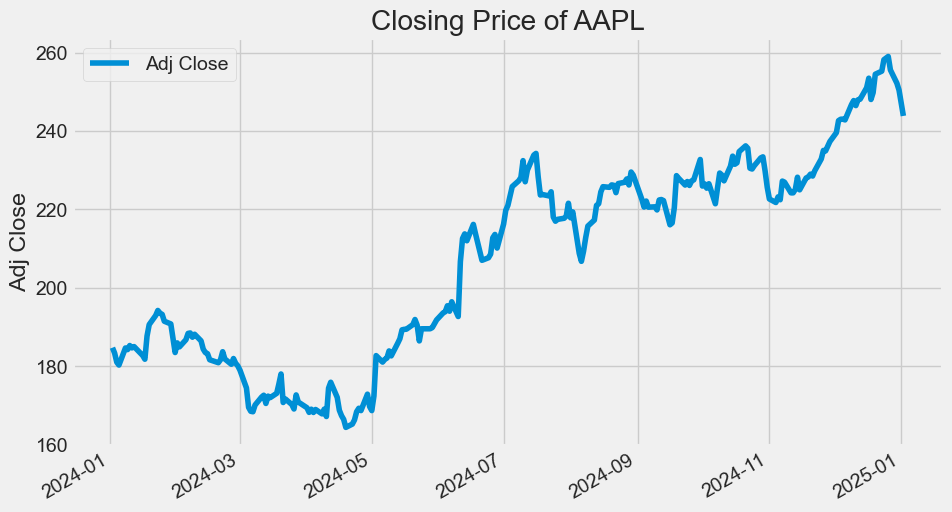

In [9]:
# Closing price
# Closing prices are useful markers for investors to use to assess changes in stock prices over time.
# Use of adj.Close is more accurate because it takes dividends, stock splits, and new stock offerings into account
plt.figure(figsize=(10, 6))
data['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {ticker_symbol}")
plt.grid(True)
plt.legend()
plt.show()

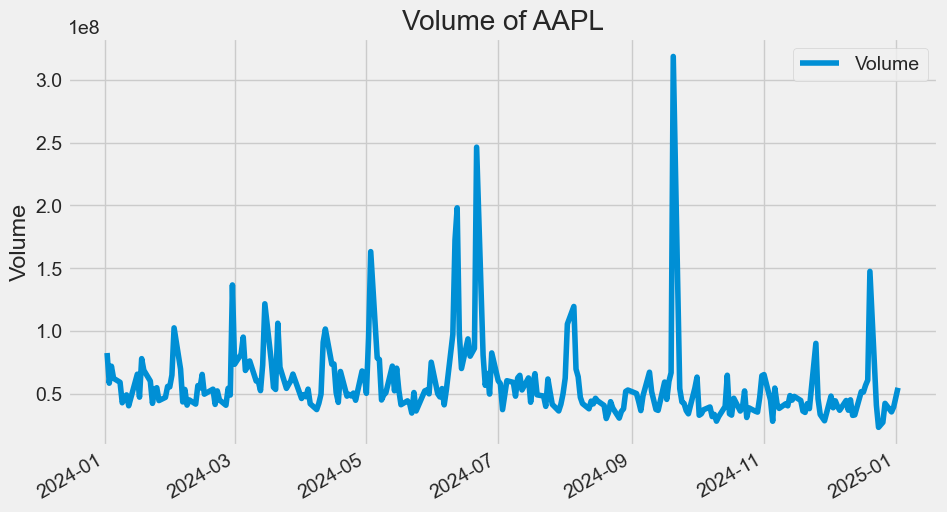

In [10]:
# Volume provides crucial clues about the strength of price movements.
# A stock rising on heavy volume, like when Apple announces better-than-expected earnings,
# suggests strong conviction from buyers. Conversely, 
# a price increase on light volume suggests less confidence in the move.

plt.figure(figsize=(10, 6))
data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Volume of {ticker_symbol}")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
# Moving averages help identify the direction of the market trend.
# By smoothing out price data over a specific period, they provide a clearer 
# view of the overall direction, helping traders to make decisions aligned with the trend.

ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Adj Close'].rolling(ma).mean()

<Figure size 1000x600 with 0 Axes>

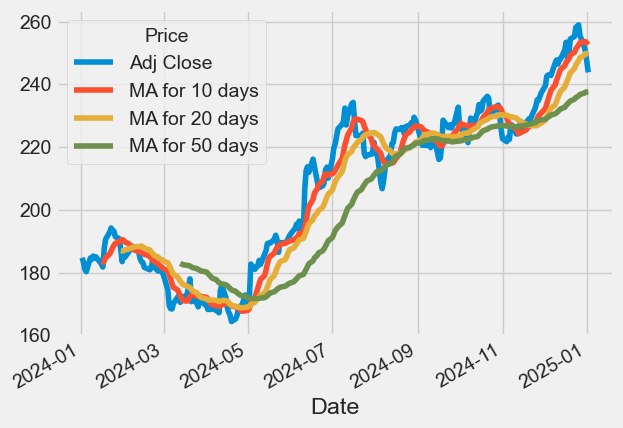

In [12]:
plt.figure(figsize=(10, 6))
data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.show()

<Axes: xlabel='Date'>

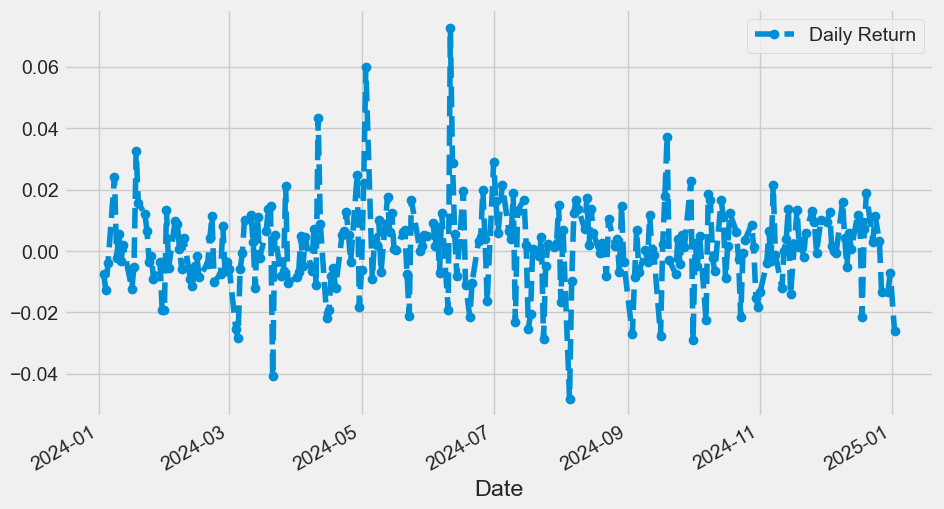

In [13]:
# Analyzing risk of the stock
# First I will start by analyzing daily return which is the percentage increase in relation to the previous 
# day closing price

data['Daily Return'] = data['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(10, 6))
data['Daily Return'].plot( legend=True, linestyle='--', marker='o')


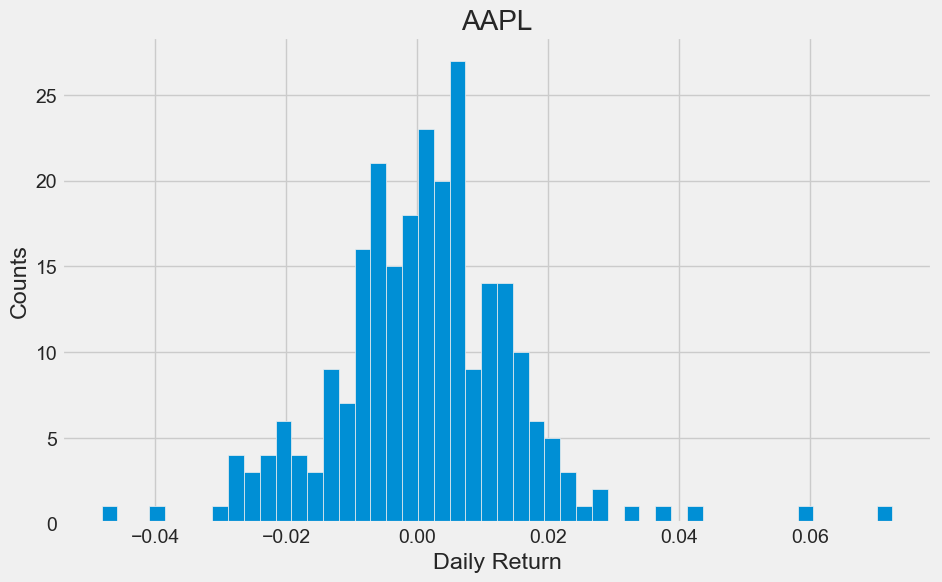

In [14]:
# Next I will analyze risk using the daily return average 
plt.figure(figsize=(10, 6))

data['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'{ticker_symbol}')
    
plt.show()

Text(50, -50, 'Stock')

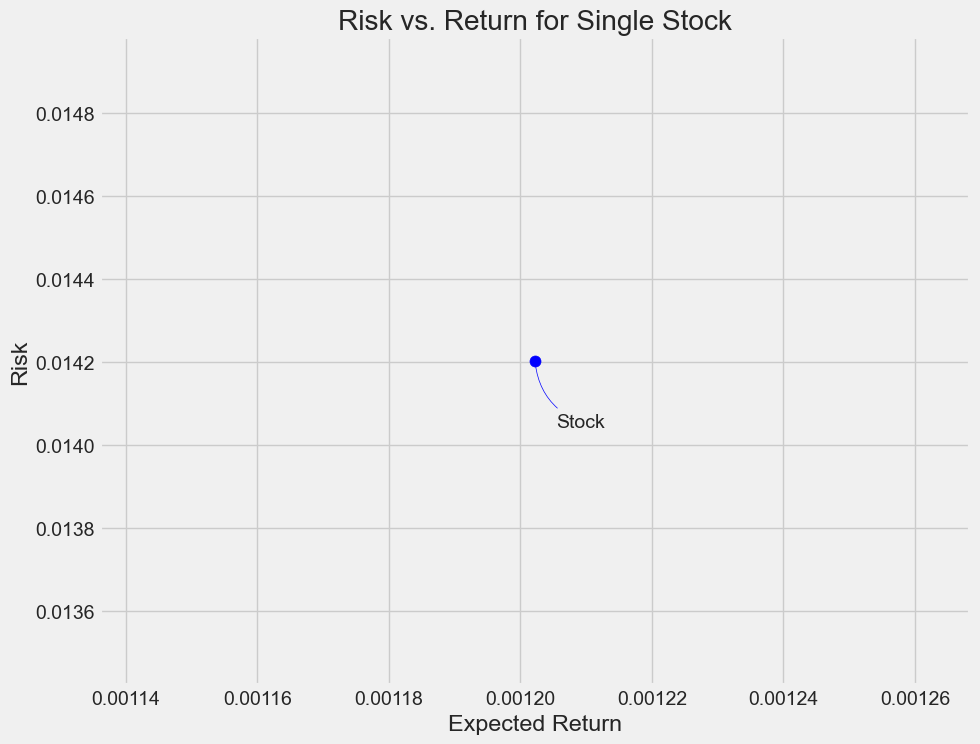

In [15]:
# Remove NaN values
stock = data['Adj Close']
stock = stock.pct_change()
stock = stock.dropna()

# # Area for scatter plot points
area = np.pi * 20

# # Calculate mean and standard deviation (risk)
mean_return = stock.mean()  # Expected return (float)
std_dev_return = stock.std()  # Risk (volatility, float)

# # Plot
plt.figure(figsize=(10, 8))
plt.scatter(mean_return, std_dev_return, s=area, label='Single Stock', color='blue')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.title('Risk vs. Return for Single Stock')

# Annotate the single point
plt.annotate(
    'Stock',
    xy=(mean_return, std_dev_return),  # Coordinates
    xytext=(50, -50),  # Offset for annotation text
    textcoords='offset points',
    ha='right',
    va='bottom',
    arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3')
)

# # Show the plot
# plt.legend()
# plt.show()

In [16]:
# Get the stock quote
df = yf.download('AAPL', start='2015-01-01', end=datetime.now())
df.columns = df.columns.droplevel(1)  # Removes the 'AAPL' level
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-02,24.347176,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661278,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663500,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995310,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917265,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...,...
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500


In [17]:
# 20-day moving average
df['MA_20'] = df['Close'].rolling(window=20).mean()
 
# 50-day moving average
df['MA_50'] = df['Close'].rolling(window=50).mean()
 
# 20-day volatility (standard deviation)
df['Volatility'] = df['Close'].rolling(window=20).std()

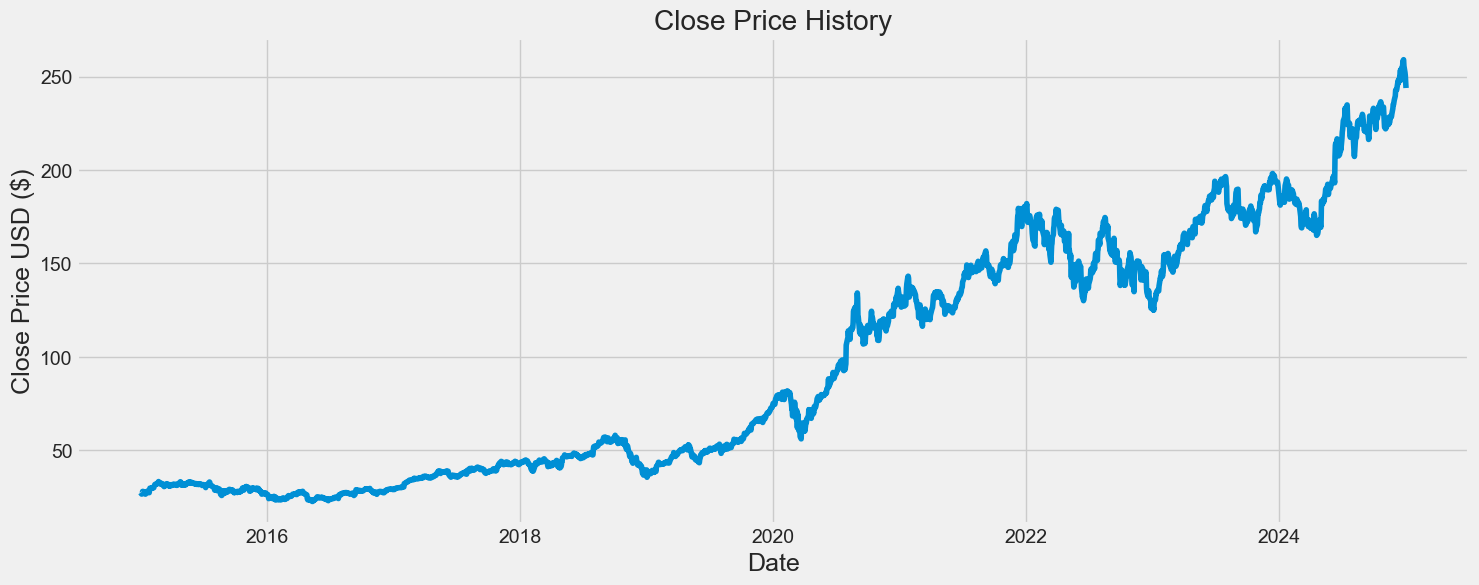

In [18]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [19]:
# Create a new df with only the 'Close column 
_data = df.filter(['Close'])
# Convert the df to a numpy array
dataset = _data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2392

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02007952],
       [0.01682281],
       [0.01683339],
       ...,
       [0.9711549 ],
       [0.9636264 ],
       [0.93583867]])

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02007952, 0.01682281, 0.01683339, 0.01840887, 0.02278639,
       0.02291328, 0.01999493, 0.02102058, 0.02057649, 0.01742551,
       0.01654789, 0.01943452, 0.02031214, 0.02332566, 0.02393893,
       0.02406581, 0.01987862, 0.02640261, 0.03019858, 0.02835875,
       0.02991309, 0.02993424, 0.03089644, 0.03129825, 0.0302303 ,
       0.03106563, 0.03349758, 0.03652167, 0.03819232, 0.03884789,
       0.03964092, 0.04058199, 0.04029649, 0.04140673, 0.04510754,
       0.04422992, 0.04065599, 0.04237952, 0.04030707, 0.04097321,
       0.0412587 , 0.04039165, 0.03813946, 0.03834035, 0.03891133,
       0.03613045, 0.0337302 , 0.036067  , 0.03515766, 0.03659568,
       0.0388056 , 0.04031764, 0.03929199, 0.03760019, 0.03898535,
       0.03843552, 0.03493561, 0.03584495, 0.03479815, 0.03809716])]
[0.036045853426235105]

[array([0.02007952, 0.01682281, 0.01683339, 0.01840887, 0.02278639,
       0.02291328, 0.01999493, 0.02102058, 0.02057649, 0.01742551,
       0.01654789, 0.01943452, 0.0

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/Users/ivanm/thesis/tensorflow_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2332/2332 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0013


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


4.060320888132352

In [24]:
 # Function to calculate R²
def calculate_r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    total_variance = np.sum((y_true - y_mean) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (residual_variance / total_variance)
    return r2_score
 
# Calculate R²
r2_score = calculate_r2(y_test, predictions)
print(f"Variance Explained (R²): {r2_score:.4f}")

Variance Explained (R²): 0.8527


In [25]:
def calculate_mape(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Calculate MAPE
mape = calculate_mape(y_test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.44%


/var/folders/yr/2h_ks9711rgcwpwzxzmktb5h0000gn/T/ipykernel_19345/4167683560.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


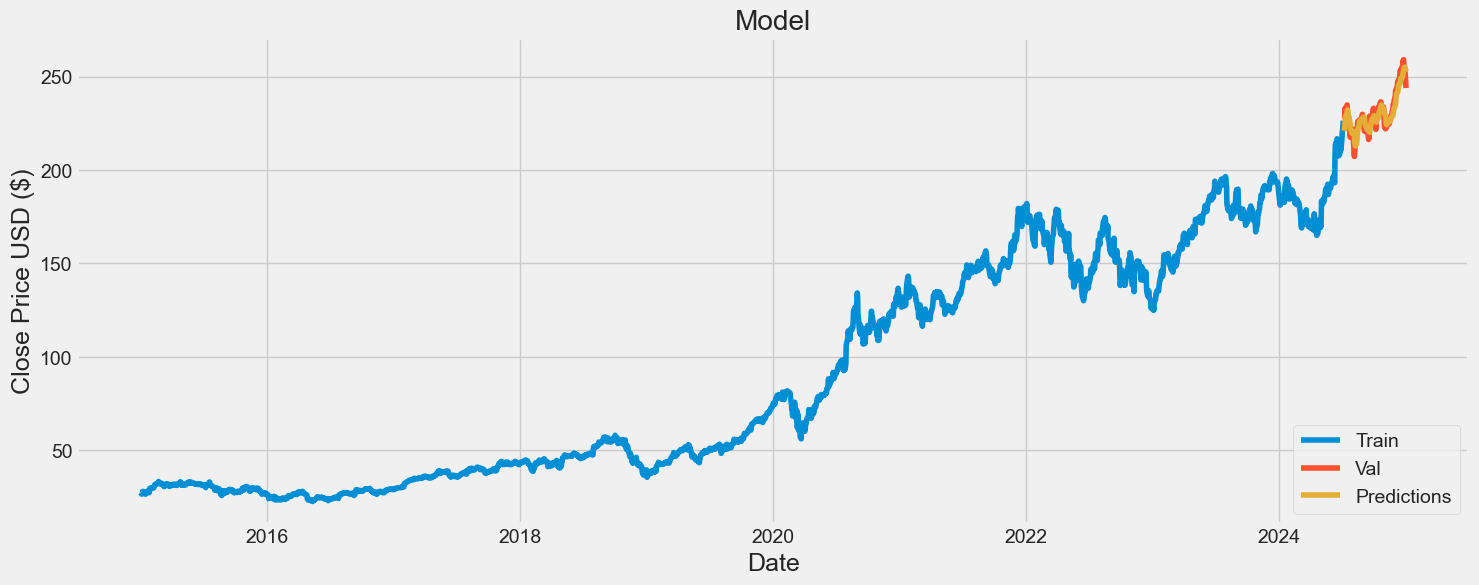

In [26]:
# Plot the data
train = _data[:training_data_len]
valid = _data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
valid

,Close,Predictions
Date,,
2024-07-08,227.820007,220.965118
2024-07-09,228.679993,223.620163
2024-07-10,232.979996,225.764175
2024-07-11,227.570007,228.212555
2024-07-12,230.539993,228.844254
...,...,...
2024-12-26,259.019989,253.016968
2024-12-27,255.589996,254.673264
2024-12-30,252.199997,255.071335


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [29]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50',
       'Volatility'],
      dtype='object', name='Price')

In [30]:
df

Price,Adj Close,Close,High,Low,Open,Volume,MA_20,MA_50,Volatility
Date,,,,,,,,,
2015-01-02,24.347176,27.332500,27.860001,26.837500,27.847500,212818400,NaN,NaN,NaN
2015-01-05,23.661278,26.562500,27.162500,26.352501,27.072500,257142000,NaN,NaN,NaN
2015-01-06,23.663500,26.565001,26.857500,26.157499,26.635000,263188400,NaN,NaN,NaN
2015-01-07,23.995310,26.937500,27.049999,26.674999,26.799999,160423600,NaN,NaN,NaN
2015-01-08,24.917265,27.972500,28.037500,27.174999,27.307501,237458000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-12-26,259.019989,259.019989,260.100006,257.630005,258.190002,27237100,247.491499,236.417399,6.576780
2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,248.524500,236.893599,6.105559
2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,249.267999,237.294599,5.550798


In [33]:
model.save('best_model.h5')

In [34]:
import joblib

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']